<a href="https://colab.research.google.com/github/Banzanic/PSI-projekt/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# **Wczytywanie danych**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Banzanic/PSI-projekt/main/test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


# **Przetwarzanie danych**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [5]:
plt.figure(figsize=(9,3),dpi=150)
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

<Figure size 1350x450 with 0 Axes>

In [6]:
del df['school']
del df['classroom']
del df['student_id']
del df['gender']
df['school_setting'] = df['school_setting'].replace('Urban', 0)
df['school_setting'] = df['school_setting'].replace('Suburban', 1)
df['school_setting'] = df['school_setting'].replace('Rural', 2)
df['school_type'] = df['school_type'].replace('Non-public', 0)
df['school_type'] = df['school_type'].replace('Public', 1)
df['lunch'] = df['lunch'].replace('Does not qualify', 0)
df['lunch'] = df['lunch'].replace('Qualifies for reduced/free lunch', 1)
df['teaching_method'] = df['teaching_method'].replace('Standard', 0)
df['teaching_method'] = df['teaching_method'].replace('Experimental', 1)

In [7]:
df.head()

,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
0,0,0,0,20.0,0,62.0,72.0
1,0,0,0,20.0,0,66.0,79.0
2,0,0,0,20.0,0,64.0,76.0
3,0,0,0,20.0,0,61.0,77.0
4,0,0,0,20.0,0,64.0,76.0


In [8]:
df.describe()

,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,0.814346,0.741678,0.356306,22.796531,0.430380,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.495245,13.563101,13.986789
min,0.000000,0.000000,0.000000,14.000000,0.000000,22.000000,32.000000
25%,0.000000,0.000000,0.000000,20.000000,0.000000,44.000000,56.000000
50%,1.000000,1.000000,0.000000,22.000000,0.000000,56.000000,68.000000
75%,1.000000,1.000000,1.000000,27.000000,1.000000,65.000000,77.000000
max,2.000000,1.000000,1.000000,31.000000,1.000000,93.000000,100.000000


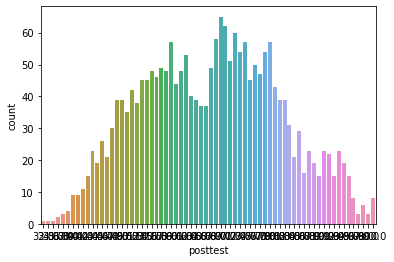

In [9]:
sns.countplot(x='posttest', data=df)

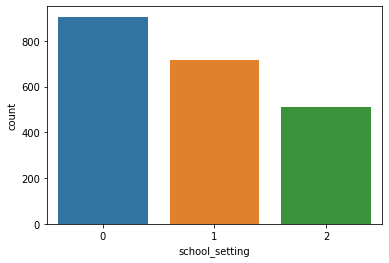

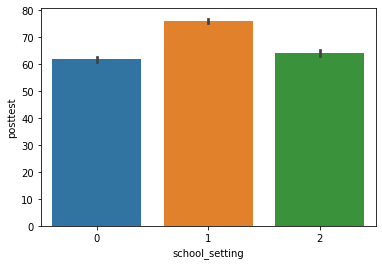

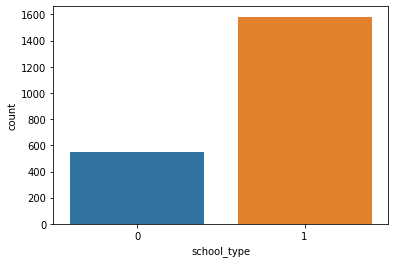

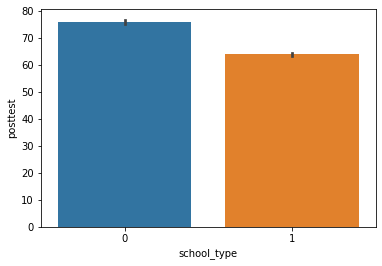

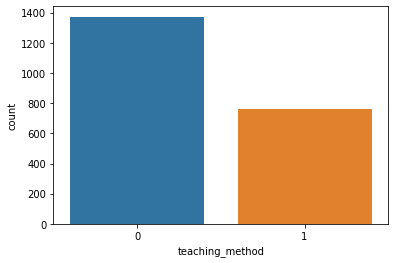

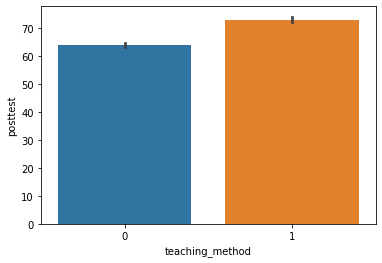

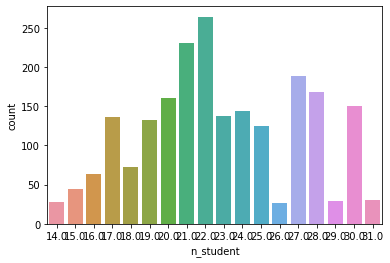

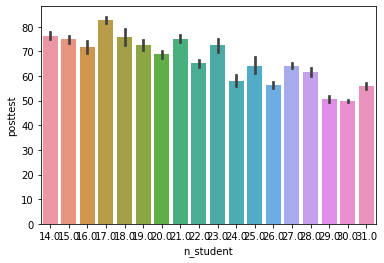

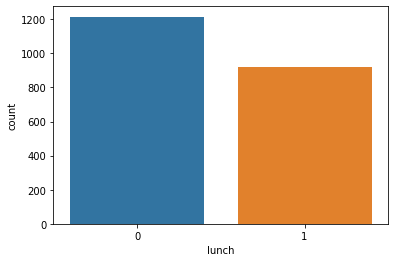

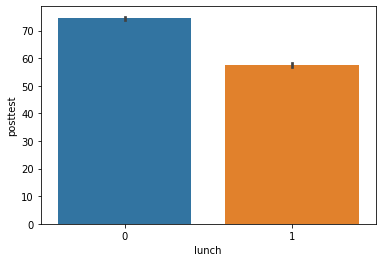

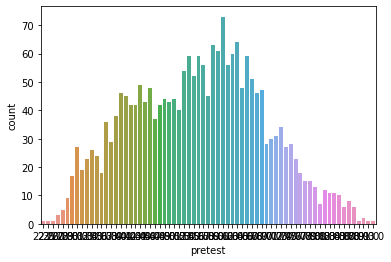

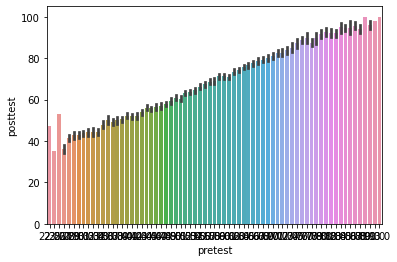

In [10]:
for column in ['school_setting', 'school_type', 'teaching_method', 'n_student', 'lunch', 'pretest']:
    sns.countplot(x=column, data=df)
    plt.show()
    sns.barplot(x=column, y='posttest', data=df)
    plt.show()

# **Modelowanie danych**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['posttest'], test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
seed=123
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=seed)

**Logistic Regression**

In [18]:
pipeline_1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])
param_grid_1 = {
            'preprocessing': [StandardScaler()],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_1 = GridSearchCV(pipeline_1, param_grid_1, cv=kfold, return_train_score=True) 
grid_1.fit(X_train, y_train)
grid_1.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__C': 100, 'preprocessing': StandardScaler()}

**SVC Poly**

In [19]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly', probability=True))])
param_grid_2 = {
            'preprocessing': [StandardScaler()],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__coef0': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__degree': [1, 2, 3, 4, 5, 6]
}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__C': 10,
 'classifier__coef0': 100,
 'classifier__degree': 2,
 'preprocessing': StandardScaler()}

**SVC Linear**

In [20]:
pipeline3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])
param_grid_3 = {
            'preprocessing': [StandardScaler()],
            'classifier__gamma': [ 0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_3 = GridSearchCV(pipeline3, param_grid_3, cv=kfold, return_train_score=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler()}

**SVC Rbf**

In [21]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="rbf", probability=True))])
param_grid_4 = {
            'preprocessing': [StandardScaler()],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__C': 100, 'preprocessing': StandardScaler()}

**Random Forest**

In [22]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])
param_grid_5 = {
            'preprocessing': [StandardScaler()],
            'classifier__n_estimators' : [1, 5, 15, 30, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}
grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

**Decision Tree**

In [23]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])
param_grid_6 = {
            'preprocessing': [StandardScaler()],
            'classifier__max_depth': [1, 5, 15, 30, 50, 100],
            'classifier__max_leaf_nodes': [2, 4, 8, 16, 32, 64],
}
grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)
grid_6.fit(X_train, y_train)
grid_6.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__max_depth': 30,
 'classifier__max_leaf_nodes': 64,
 'preprocessing': StandardScaler()}

**Ada Boost**

In [24]:
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])
param_grid_7 = {
            'preprocessing': [StandardScaler()],
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}
grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)
grid_7.fit(X_train, y_train)
grid_7.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__learning_rate': 1,
 'classifier__n_estimators': 700,
 'preprocessing': StandardScaler()}

**Gradient Boosting**

In [25]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])
param_grid_8 = {
            'preprocessing': [StandardScaler()],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}
grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)
grid_8.fit(X_train, y_train)
grid_8.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'classifier__learning_rate': 0.01,
 'classifier__n_estimators': 500,
 'preprocessing': StandardScaler()}

# **Porównywanie modeli**

In [40]:
from sklearn import metrics
models = []
models.append(('Logistic regression', grid_1.best_estimator_))
models.append(('SVC poly', grid_2.best_estimator_))
models.append(('SVC linear', grid_3.best_estimator_))
models.append(('SVC rbf', grid_4.best_estimator_))
models.append(('RandomForestClassifier', grid_5.best_estimator_))
models.append(('DecisionTreeClassifier', grid_6.best_estimator_))
models.append(('AdaBoostClassifier', grid_7.best_estimator_))
models.append(('GradientBoostingClassifier', grid_8.best_estimator_))
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='micro')))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='micro')))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    recall_score = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    f1_score = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

Logistic regression
precision_score: 0.26697892271662765
recall_score: 0.26697892271662765
f1_score: 0.26697892271662765
accuracy_score: 0.26697892271662765
SVC poly
precision_score: 0.9953161592505855
recall_score: 0.9953161592505855
f1_score: 0.9953161592505855
accuracy_score: 0.9953161592505855
SVC linear
precision_score: 0.9953161592505855
recall_score: 0.9953161592505855
f1_score: 0.9953161592505855
accuracy_score: 0.9953161592505855
SVC rbf
precision_score: 0.6955503512880562
recall_score: 0.6955503512880562
f1_score: 0.6955503512880562
accuracy_score: 0.6955503512880562
RandomForestClassifier
precision_score: 0.7681498829039812
recall_score: 0.7681498829039812
f1_score: 0.7681498829039812
accuracy_score: 0.7681498829039812
DecisionTreeClassifier
precision_score: 0.9976580796252927
recall_score: 0.9976580796252927
f1_score: 0.9976580796252927
accuracy_score: 0.9976580796252927
AdaBoostClassifier
precision_score: 0.7377049180327869
recall_score: 0.7377049180327869
f1_score: 0.7377

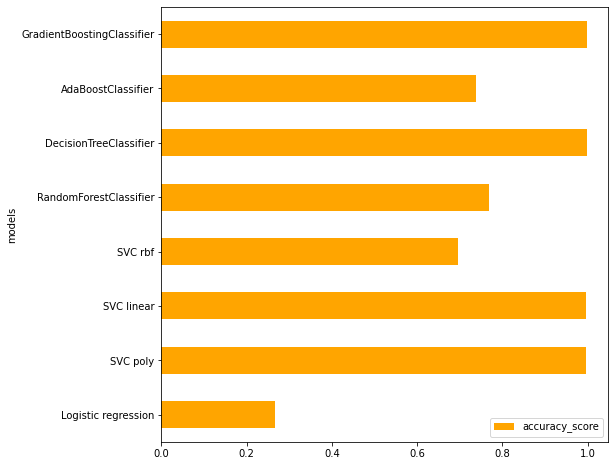

In [74]:
data = { 
    'models' : ['Logistic regression', 'SVC poly', 'SVC linear', 'SVC rbf', 'RandomForestClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier'],
    'accuracy_score' : [0.26697892271662765, 0.9953161592505855, 0.9953161592505855, 0.6955503512880562, 0.7681498829039812,  0.9976580796252927, 0.7377049180327869, 0.9976580796252927]
}
df1 = pd.DataFrame(data = data)
df1.set_index("models", inplace = True)
df1.plot.barh(figsize = (8,8), color = 'orange')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


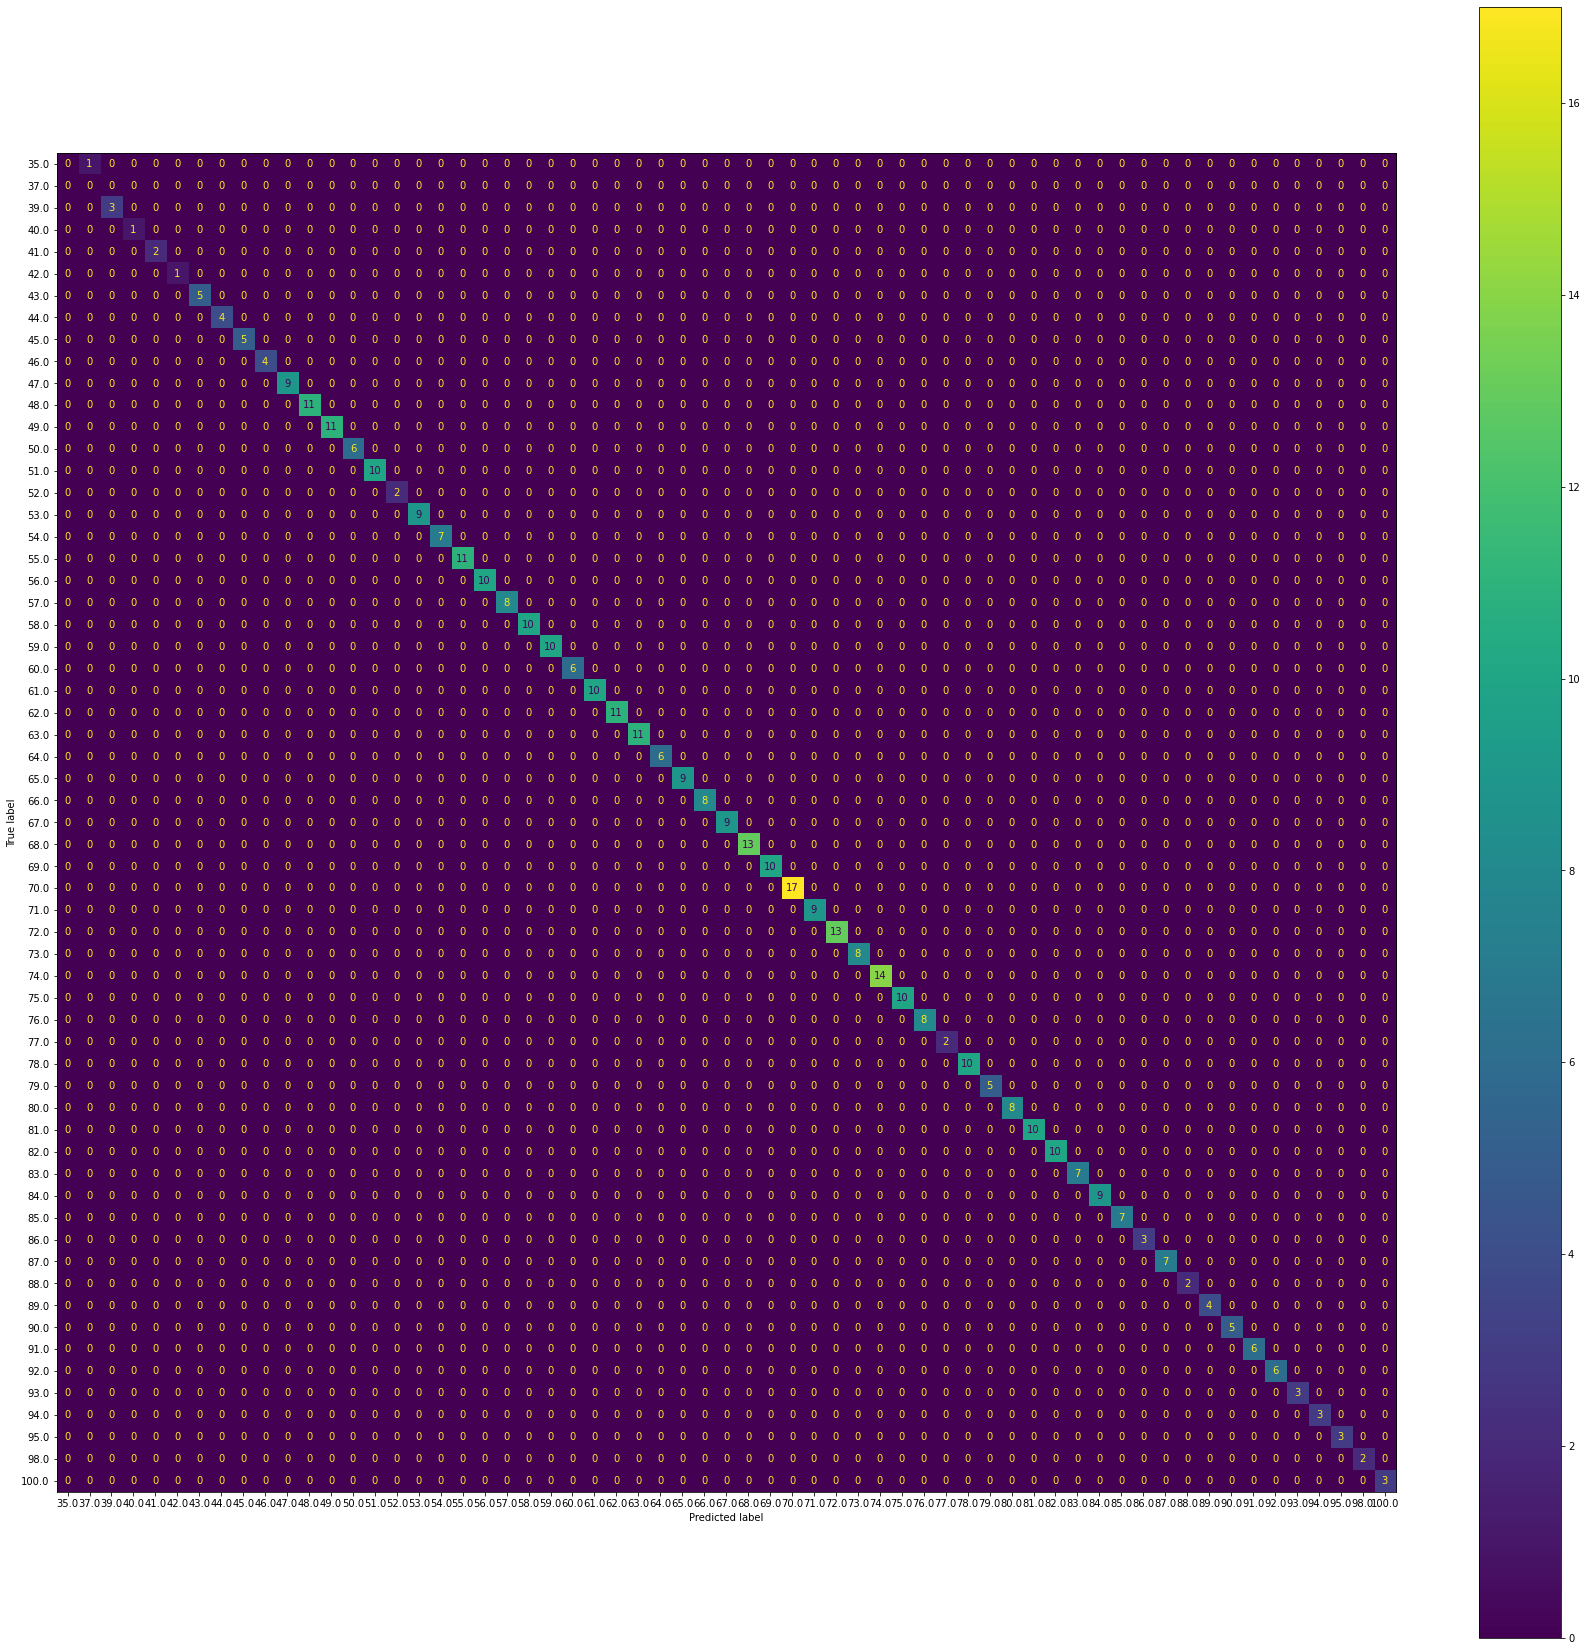

In [90]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(30, 30))
plot_confusion_matrix(grid_6, X_test, y_test, ax=ax)

# **Sieci neuronowe**

In [304]:
from sklearn.neural_network import MLPClassifier

In [305]:
pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])
param_grid_9 = {
            'preprocessing': [StandardScaler()],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500],
            'classifier__batch_size': [8, 16, 32, 64],
}
grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)
grid_9.fit(X_train, y_train)
grid_9.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: 

{'classifier__batch_size': 32,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 500,
 'preprocessing': StandardScaler()}

In [306]:
models=[]
models.append(('MLPClassifier', grid_9.best_estimator_))
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='micro')))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='micro')))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='micro')))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    recall_score = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    f1_score = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

MLPClassifier
precision_score: 0.810304449648712
recall_score: 0.810304449648712
f1_score: 0.810304449648712
accuracy_score: 0.810304449648712


In [318]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
model = Sequential()
model.add(Dense(10,activation='elu', input_shape=(X_train.shape[1],)))
model.add(Dense(10,activation='elu'))
model.add(Dense(10,activation='sigmoid'))
model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 10)                80        
                                                                 
 dense_163 (Dense)           (None, 10)                110       
                                                                 
 dense_164 (Dense)           (None, 10)                110       
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


In [319]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size = 16, epochs = 30)

Epoch 1/30
107/107 [==============================] - 1s 3ms/step - loss: 4600.3071 - val_loss: 4614.0132
Epoch 2/30
107/107 [==============================] - 0s 2ms/step - loss: 4562.1924 - val_loss: 4600.2900
Epoch 3/30
107/107 [==============================] - 0s 2ms/step - loss: 4556.2788 - val_loss: 4600.2480
Epoch 4/30
107/107 [==============================] - 0s 2ms/step - loss: 4556.2622 - val_loss: 4600.2363
Epoch 5/30
107/107 [==============================] - 0s 2ms/step - loss: 4556.2485 - val_loss: 4600.2314
Epoch 6/30
107/107 [==============================] - 0s 2ms/step - loss: 4556.2432 - val_loss: 4600.2275
Epoch 7/30
107/107 [==============================] - 0s 2ms/step - loss: 4556.2407 - val_loss: 4600.2256
Epoch 8/30
107/107 [==============================] - 0s 2ms/step - loss: 4556.2383 - val_loss: 4600.2246
Epoch 9/30
107/107 [==============================] - 0s 2ms/step - loss: 4556.2373 - val_loss: 4600.2231
Epoch 10/30
107/107 [=========================

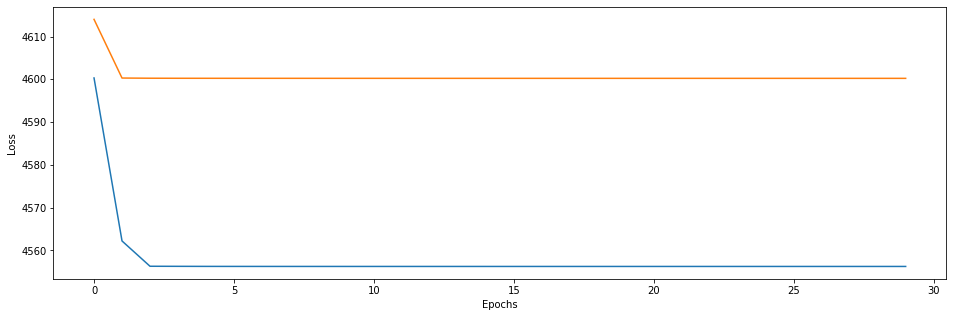

In [320]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()